In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
xls_prot = pd.ExcelFile('../data/NIHMS1603117-supplement-10.xlsx')


In [3]:
df_prot = pd.read_excel(xls_prot,'Table S3A')
df_prot.head()

,#1.3,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 218,Unnamed: 219,Unnamed: 220,Unnamed: 221,Unnamed: 222,Unnamed: 223,Unnamed: 224,Unnamed: 225,Unnamed: 226,Unnamed: 227
0,10699,211,16,68,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,id,id.description,geneSymbol,numColumnsProteinObserved,numSpectraProteinObserved,protein_mw,percentCoverage,numPepsUnique,scoreUnique,species,...,C3N.02003.N,C3N.02379.N,C3N.00175,C3N.00175.N,C3N.01823,C3N.01823.N,C3L.02549,C3L.02549.N,C3L.02365,C3L.02365.N
2,Sample.ID,na,na,na,na,na,na,na,na,na,...,C3N.02003.N,C3N.02379.N,C3N.00175,C3N.00175.N,C3N.01823,C3N.01823.N,C3L.02549,C3L.02549.N,C3L.02365,C3L.02365.N
3,Sample.IDs,na,na,na,na,na,na,na,na,na,...,C3N.02003.N,C3N.02379.N,C3N.00175,C3N.00175.N,C3N.01823,C3N.01823.N,C3L.02549,C3L.02549.N,C3L.02365,C3L.02365.N
4,Participant,na,na,na,na,na,na,na,na,na,...,C3N-02003,C3N-02379,C3N-00175,C3N-00175,C3N-01823,C3N-01823,C3L-02549,C3L-02549,C3L-02365,C3L-02365


In [4]:
df_prot.shape

(10769, 228)

In [7]:
df_prot.iloc[72:,0:16]

,#1.3,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
72,NP_000436.2,plectin isoform 1c GN=PLEC,PLEC,25,192,520403,81.5,465,7925.64,HOMO SAPIENS,NaN,NP_000436.2,NP_000436.2,1.3,plectin isoform 1c GN=PLEC,PLEC
73,NP_958786.1,plectin isoform 1a GN=PLEC,PLEC,25,54,518129,81,462,7877.75,HOMO SAPIENS,NaN,NP_958786.1,NP_958786.1,1.5,plectin isoform 1a GN=PLEC,PLEC
74,NP_958781.1,plectin isoform 1e GN=PLEC,PLEC,24,54,515637,81.4,462,7869.23,HOMO SAPIENS,NaN,NP_958781.1,NP_958781.1,1.6,plectin isoform 1e GN=PLEC,PLEC
75,NP_112598.3,epiplakin GN=EPPK1,EPPK1,25,4482,558101,48.1,199,3714.49,HOMO SAPIENS,NaN,NP_112598.3,NP_112598.3,1.8,epiplakin GN=EPPK1,EPPK1
76,NP_892006.3,nesprin-1 isoform 1 (nesprin-1 giant or enapt...,SYNE1,25,6370,1.01774e+06,63.6,478,7507.45,HOMO SAPIENS,NaN,NP_892006.3,NP_892006.3|NP_001334630.1,2.1,nesprin-1 isoform 1 (nesprin-1 giant or enapt...,SYNE1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10764,NP_001120701.1,aurora kinase A-interacting protein GN=AURKAIP1,AURKAIP1,13,21,22582.1,5,1,17.54,HOMO SAPIENS,NaN,NP_001120701.1,NP_001120701.1,10955.1,aurora kinase A-interacting protein GN=AURKAIP1,AURKAIP1
10765,NP_060147.2,myotubularin-related protein 8 GN=MTMR8,MTMR8,17,36,80172.4,2.1,2,17.27,HOMO SAPIENS,NaN,NP_060147.2,NP_060147.2,10957.1,myotubularin-related protein 8 GN=MTMR8,MTMR8
10766,NP_775494.1,protein SSX7 GN=SSX7,SSX7,7,16,21705.1,8.5,2,16.38,HOMO SAPIENS,NaN,NP_775494.1,NP_775494.1|NP_001030004.1,10970.1,protein SSX7 GN=SSX7,SSX7
10767,NP_001184058.1,protein SYS1 homolog isoform a GN=SYS1,SYS1,15,24,17899.9,5.7,1,15.76,HOMO SAPIENS,NaN,NP_001184058.1,NP_001184058.1,10989.1,protein SYS1 homolog isoform a GN=SYS1,SYS1


In [352]:
list_adc_gene = [
    "TACSTD2", #trop2
    "MET",
    "CEACAM5",
    "ERBB2",
    "ERBB3", #HER3
    "NECTIN4", 
    "CD276", #B7H3
    "PTK7",
    "TF", #TF?
    "SLC34A2" #NAPI2B
]

In [353]:
df_adc_prot = df_prot.iloc[72:,18:]
df_adc_prot.columns = df_prot.iloc[3,18:]
df_adc_prot.index = pd.MultiIndex.from_frame(df_prot.iloc[72:,0:3])
list_adc_prot = [
    "TACSTD2", #trop2
    "MET",
    "CEACAM5",
    "ERBB2",
    "ERBB3", #HER3
    "NECTIN4", 
    "CD276", #B7H3
    "PTK7",
    "TF", #TF?
    "SLC34A2" #NAPI2B
]
#list_adc_prot = ["TACSTD2","MET","CEACAM5","ERBB2","ERBB3","NECTIN4","CD276"]
df_adc_prot = df_adc_prot.loc[pd.IndexSlice[:, :, list_adc_gene],:]
df_adc_prot = df_adc_prot.replace('NA',np.nan)
df_adc_prot = df_adc_prot.dropna()
df_adc_prot

,,3,C3N.01799.N,C3L.01890,C3L.01890.N,C3N.00572,C3N.00572.N,C3N.02423,C3N.02423.N,C3N.02729,C3N.02729.N,C3L.00263,...,C3N.02003.N,C3N.02379.N,C3N.00175,C3N.00175.N,C3N.01823,C3N.01823.N,C3L.02549,C3L.02549.N,C3L.02365,C3L.02365.N
#1.3,Unnamed: 1,Unnamed: 2,,,,,,,,,,,,,,,,,,,,,
NP_001054.1,serotransferrin isoform 1 precursor GN=TF,TF,2.3125,-0.3979,1.4785,0.3905,2.1821,-0.9711,3.8860,-0.8474,3.0722,-1.4656,...,1.0577,1.9472,0.8284,1.7780,-0.9446,1.8888,-1.0120,3.3504,-2.5080,1.5236
NP_004439.2,receptor tyrosine-protein kinase erbB-2 isoform a precursor GN=ERBB2,ERBB2,-0.9890,1.2883,-0.4554,-0.6565,-1.3873,0.0851,-0.3230,-0.4460,-1.4386,-0.7956,...,-1.0341,-0.5908,1.3246,-0.3276,-0.6704,-0.6001,1.2775,-0.7997,0.5048,-0.0548
NP_000236.2,hepatocyte growth factor receptor isoform b preproprotein GN=MET,MET,-1.5648,-0.4985,-1.5077,-0.7483,-1.8750,3.9726,-0.3013,-1.8944,-2.9484,-1.6838,...,-1.7263,-2.5538,4.1465,-1.5094,-3.9817,-2.7345,0.2860,-1.5166,2.4017,0.6051
NP_001257327.1,inactive tyrosine-protein kinase 7 isoform e GN=PTK7,PTK7,-0.8293,1.0211,0.0742,-0.9550,-1.1508,1.0619,-0.1783,3.2083,-0.8673,-1.4033,...,-0.9844,-0.6990,0.5916,-0.0980,0.8077,0.3720,-1.4491,-0.0972,0.1779,-0.3435
NP_001973.2,receptor tyrosine-protein kinase erbB-3 isoform 1 precursor GN=ERBB3,ERBB3,-0.0438,0.6915,1.6980,-0.3167,0.6819,-1.6422,1.5951,0.3494,-0.0921,-0.8299,...,0.4267,0.1666,-0.2777,-1.0247,0.2967,1.1505,1.7946,0.0216,-0.6787,-0.5385
NP_006415.2,sodium-dependent phosphate transport protein 2B isoform a GN=SLC34A2,SLC34A2,-1.0356,-1.2167,-0.4101,5.1203,-2.2556,-0.2882,-0.5257,1.5108,-0.6336,-3.7624,...,-0.9653,-0.6712,0.2737,-1.5944,-2.3910,0.3538,-3.4535,0.6917,0.3130,-0.8047
NP_001278413.1,carcinoembryonic antigen-related cell adhesion molecule 5 isoform 1 preproprotein GN=CEACAM5,CEACAM5,-2.0474,4.1750,-0.2429,-0.6243,-1.9341,-2.4801,-1.0396,-4.1840,-2.6776,-1.4750,...,-7.4475,-7.1259,-1.2475,-0.8434,5.9004,-2.1607,-1.6704,-2.3344,2.2207,-1.6070
NP_112178.2,nectin-4 precursor GN=NECTIN4,NECTIN4,-0.0305,3.8766,-0.4171,-0.1927,-0.4820,1.5980,-0.5257,-1.1956,-3.5568,-0.3780,...,-2.6748,-2.1396,1.6003,-1.4980,-1.8945,-2.6249,1.2695,-2.1579,0.7669,-0.7897
NP_001019907.1,CD276 antigen isoform a precursor GN=CD276,CD276,-1.3085,0.6568,0.2241,-1.1616,-1.5203,2.0348,-0.8949,-0.2172,-0.4333,0.0116,...,-0.0322,0.1233,-1.8865,-1.0191,-0.3990,-0.3589,0.5232,-0.9691,-0.0464,-0.6210


In [341]:
def color(i):
    if i[-1] == 'N':
        return('gray')
    else:
        return('red')

colors = [color(i) for i in df_adc.columns]
colors

['gray',
 'red',
 'gray',
 'red',
 'gray',
 'red',
 'gray',
 'red',
 'gray',
 'red',
 'gray',
 'red',
 'gray',
 'red',
 'gray',
 'red',
 'gray',
 'red',
 'gray',
 'red',
 'gray',
 'red',
 'gray',
 'red',
 'gray',
 'red',
 'gray',
 'red',
 'gray',
 'red',
 'gray',
 'red',
 'gray',
 'red',
 'gray',
 'red',
 'gray',
 'red',
 'gray',
 'red',
 'red',
 'gray',
 'red',
 'gray',
 'red',
 'gray',
 'red',
 'gray',
 'red',
 'red',
 'gray',
 'red',
 'gray',
 'red',
 'gray',
 'red',
 'gray',
 'red',
 'gray',
 'red',
 'gray',
 'red',
 'gray',
 'red',
 'gray',
 'red',
 'red',
 'gray',
 'red',
 'gray',
 'red',
 'gray',
 'red',
 'red',
 'gray',
 'red',
 'gray',
 'red',
 'gray',
 'red',
 'gray',
 'red',
 'red',
 'gray',
 'red',
 'gray',
 'red',
 'gray',
 'red',
 'gray',
 'red',
 'gray',
 'red',
 'gray',
 'red',
 'gray',
 'red',
 'gray',
 'red',
 'red',
 'gray',
 'red',
 'gray',
 'red',
 'gray',
 'red',
 'gray',
 'red',
 'red',
 'gray',
 'red',
 'gray',
 'red',
 'gray',
 'red',
 'gray',
 'red',
 'gray',


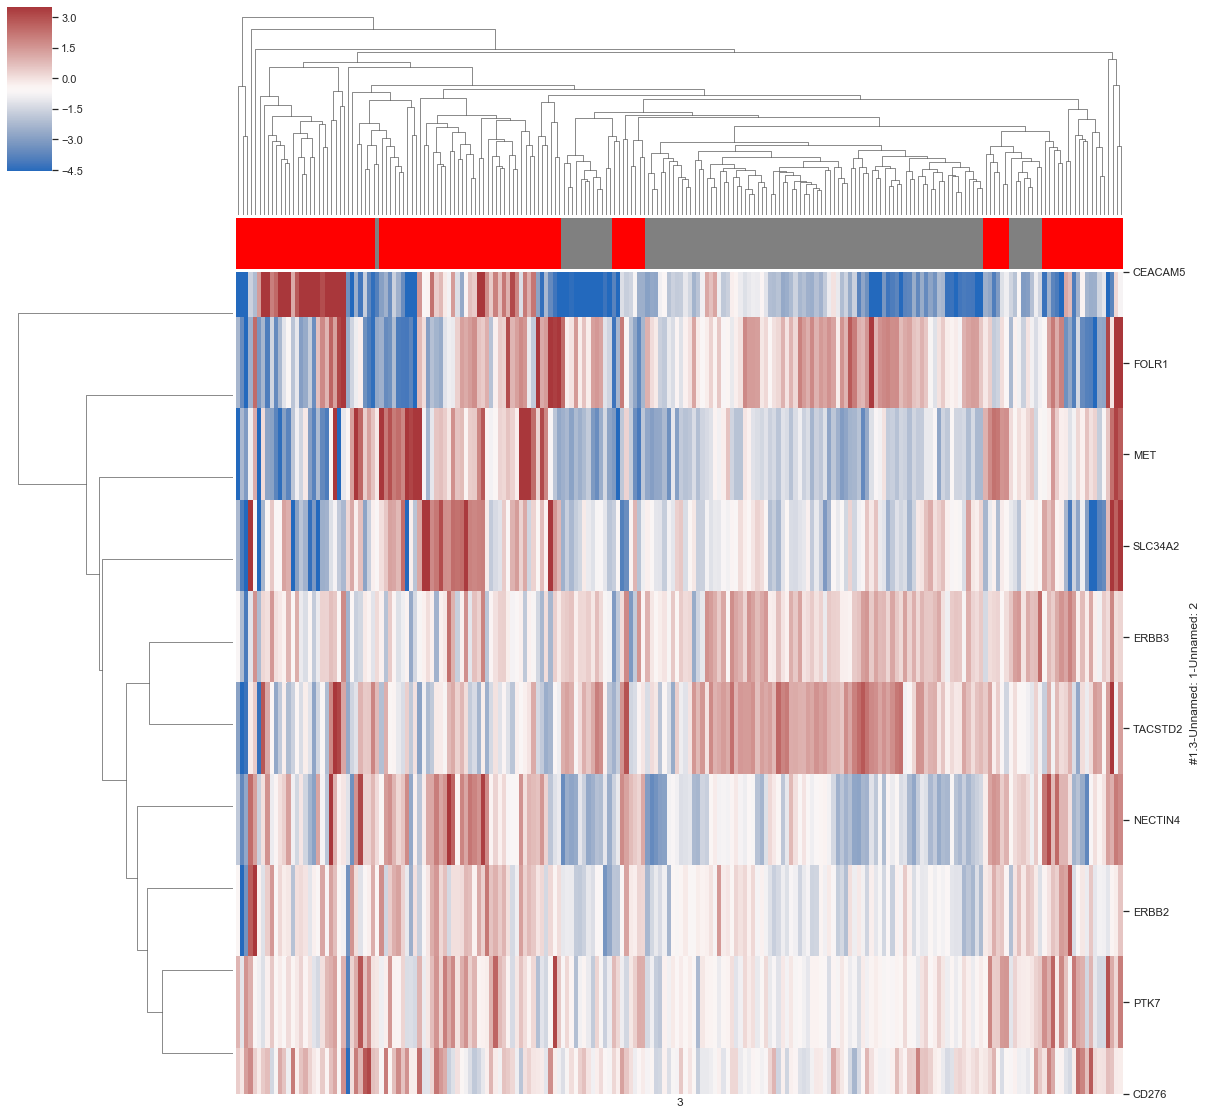

In [346]:

g=sns.clustermap(df_adc_prot,cmap="vlag",robust=True,col_colors=colors,
              linecolor='black',
               xticklabels=False, yticklabels= [i[-1] for i in df_adc_prot.index])
g.fig.set_size_inches(20,20)


In [135]:
xls_rna = pd.ExcelFile('../data/NIHMS1603117-supplement-9.xlsx')
xls_rna

In [322]:
df_rna = pd.read_excel(xls_rna,'Table S2D')
df_rna.head()

,#1.3,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 207,Unnamed: 208,Unnamed: 209,Unnamed: 210,Unnamed: 211,Unnamed: 212,Unnamed: 213,Unnamed: 214,Unnamed: 215,Unnamed: 216
0,18099,211,5,68,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,id,gene_id,geneSymbol,gene_type,length,id,C3N.02529.N,C3N.02149,C3N.02087,C3L.00368,...,C3N.02729.N,C3N.02588.N,C3N.01023,C3L.00913,C3N.01414.N,X11LU016,C3N.00560.N,C3L.01632.N,C3L.00510.N,C3L.00144.N
2,Sample.ID,na,na,na,na,na,C3N.02529.N,C3N.02149,C3N.02087,C3L.00368,...,C3N.02729.N,C3N.02588.N,C3N.01023,C3L.00913,C3N.01414.N,X11LU016,C3N.00560.N,C3L.01632.N,C3L.00510.N,C3L.00144.N
3,Sample.IDs,na,na,na,na,na,C3N.02529.N,C3N.02149,C3N.02087,C3L.00368,...,C3N.02729.N,C3N.02588.N,C3N.01023,C3L.00913,C3N.01414.N,X11LU016,C3N.00560.N,C3L.01632.N,C3L.00510.N,C3L.00144.N
4,Participant,na,na,na,na,na,C3N-02529,C3N-02149,C3N-02087,C3L-00368,...,C3N-02729,C3N-02588,C3N-01023,C3L-00913,C3N-01414,11LU016,C3N-00560,C3L-01632,C3L-00510,C3L-00144


In [354]:
df_adc_rna = df_rna.iloc[72:,18:]
df_adc_rna.columns = df_rna.iloc[3,18:]
df_adc_rna.index = pd.MultiIndex.from_frame(df_rna.iloc[72:,0:3])
#list_adc_rna = ["TACSTD2","MET","CEACAM5","ERBB2","ERBB3","NECTIN4","PTK7","F3","FOLR1","SLC34A2","CD276"]

df_adc_rna = df_adc_rna.loc[pd.IndexSlice[:, :, list_adc_gene],:]
df_adc_rna = df_adc_rna.replace('NA',np.nan)
df_adc_rna = df_adc_rna.dropna()
df_adc_rna

,,3,C3N.00579,C3N.01488,C3N.02588,C3N.00556.N,C3N.00293,C3L.01889.N,C3N.00294,C3N.00433.N,C3N.00580,C3N.00199.N,...,C3N.02729.N,C3N.02588.N,C3N.01023,C3L.00913,C3N.01414.N,X11LU016,C3N.00560.N,C3L.01632.N,C3L.00510.N,C3L.00144.N
#1.3,Unnamed: 1,Unnamed: 2,,,,,,,,,,,,,,,,,,,,,
TACSTD2,ENSG00000184292.6,TACSTD2,6.3529,6.2235,6.0480,6.1050,6.5396,5.4545,6.7201,5.1324,5.5058,5.5253,...,5.3181,5.6213,3.9028,6.6062,5.7639,5.9212,5.8602,4.7276,5.3980,5.3792
NECTIN4,ENSG00000143217.8,NECTIN4,4.8247,2.6305,4.5700,1.7713,5.0783,1.8955,4.4262,2.1673,4.2165,1.5212,...,0.8851,2.2188,2.8980,2.2774,1.7509,4.4677,1.4016,1.6291,1.1831,1.5189
TF,ENSG00000091513.14,TF,-2.0996,-1.3788,-0.4119,-2.2339,-0.9735,0.1893,-4.0712,-0.2809,-0.0627,-0.5081,...,-0.2860,-0.0887,-1.8803,-1.0013,-1.0538,-1.7521,-1.4382,-0.4380,0.3082,-0.8978
SLC34A2,ENSG00000157765.11,SLC34A2,8.4761,7.3967,8.9188,8.0196,9.6430,7.8133,9.3335,8.4782,8.8865,7.0262,...,7.9168,8.5123,7.4748,6.4101,8.2053,9.1087,7.5118,8.4105,8.6291,8.1904
PTK7,ENSG00000112655.15,PTK7,5.1607,4.6638,5.6829,3.5942,5.6579,4.0833,3.7853,3.7485,5.9822,3.7203,...,4.0632,4.2480,4.1595,3.1534,4.0704,4.3947,3.9361,3.8678,4.2231,3.9600
MET,ENSG00000105976.14,MET,6.1318,5.6409,5.8221,4.6522,7.0226,5.1127,7.2328,5.1927,7.6484,4.5713,...,4.9703,5.4873,1.7169,5.6864,5.1030,6.6257,4.8938,4.8315,4.9612,4.6002
ERBB3,ENSG00000065361.14,ERBB3,5.3883,4.5543,4.1192,4.2315,5.5036,4.3835,4.5055,4.6076,5.2710,4.3628,...,4.4095,4.5503,5.1774,5.1896,4.0343,4.4443,3.8351,4.1771,3.9517,4.2873
CD276,ENSG00000103855.17,CD276,3.2663,4.1254,4.4230,2.7940,3.7570,2.6979,3.5838,2.9923,2.8316,2.2140,...,2.8561,2.9164,3.4520,3.8689,3.1682,3.6222,3.1972,2.3748,2.9485,2.9599
ERBB2,ENSG00000141736.13,ERBB2,4.9071,4.9862,5.9013,4.4979,5.5865,4.4292,5.7498,4.3147,5.0591,4.4667,...,4.6414,4.7701,4.8000,3.9309,4.0166,5.9025,4.1309,4.1656,4.4359,4.3728


Coefficients: 
 0.8068477792633295
Mean squared error: 1.87
Coefficient of determination: 0.18


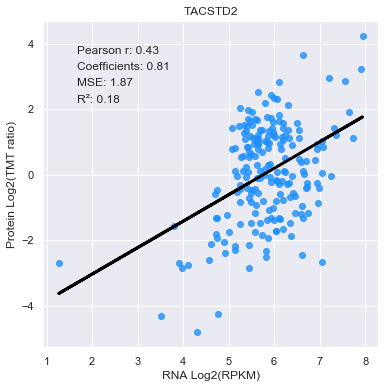

Coefficients: 
 1.3954669410956904
Mean squared error: 1.17
Coefficient of determination: 0.70


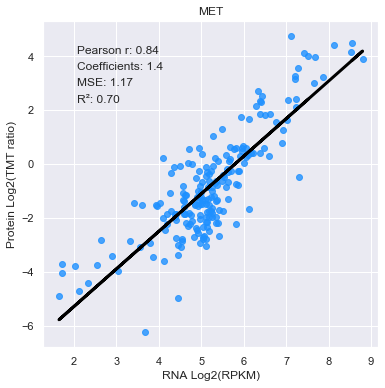

Coefficients: 
 0.6755280414331469
Mean squared error: 4.10
Coefficient of determination: 0.54


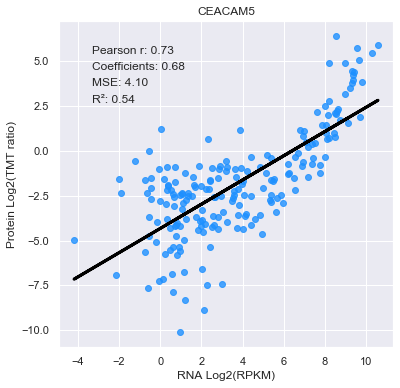

Coefficients: 
 1.152554674945199
Mean squared error: 0.70
Coefficient of determination: 0.51


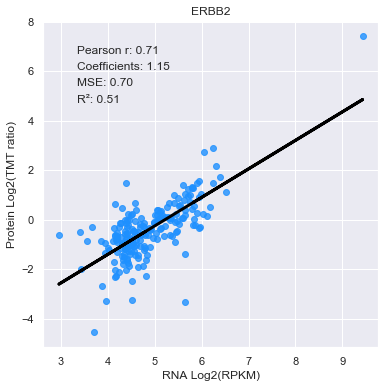

Coefficients: 
 0.40455306374343314
Mean squared error: 1.08
Coefficient of determination: 0.07


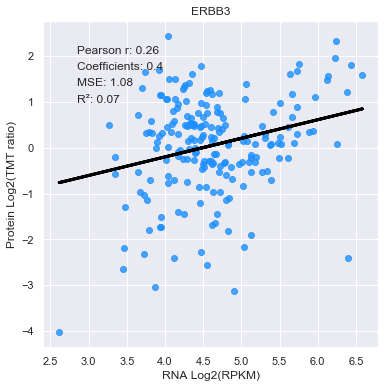

Coefficients: 
 0.8097279849459195
Mean squared error: 1.10
Coefficient of determination: 0.54


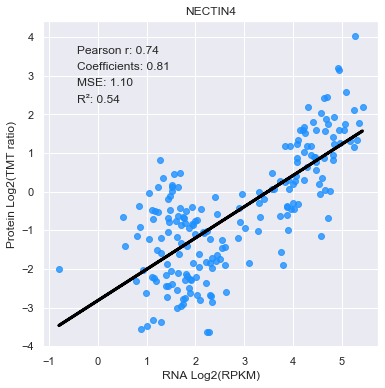

Coefficients: 
 1.0412724071593213
Mean squared error: 0.70
Coefficient of determination: 0.33


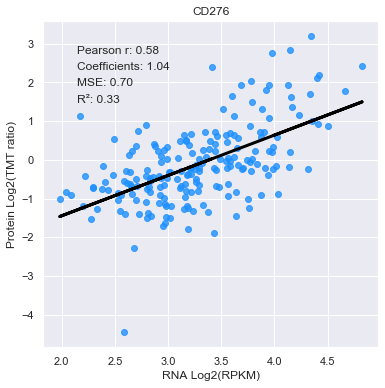

Coefficients: 
 1.054831268591167
Mean squared error: 0.54
Coefficient of determination: 0.47


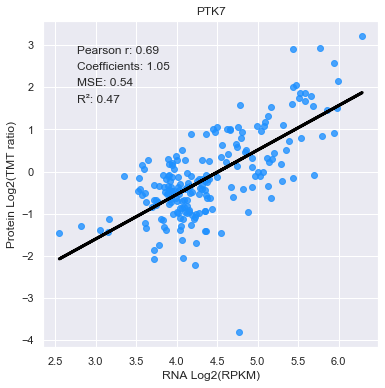

Coefficients: 
 -0.05550339229460652
Mean squared error: 4.31
Coefficient of determination: 0.00


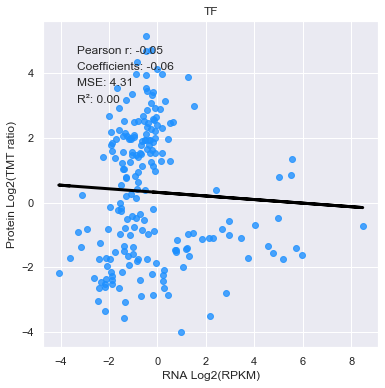

Coefficients: 
 1.2943311864462894
Mean squared error: 1.68
Coefficient of determination: 0.55


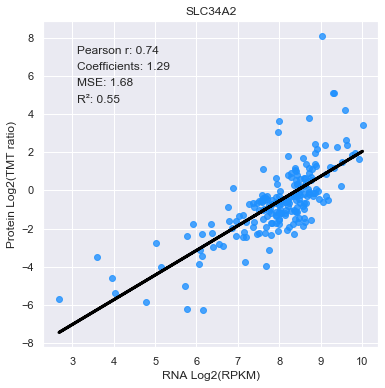

In [356]:

def plot_rna_prot(gene_id):
    cols_shared = set.intersection(
        set(df_adc_prot.columns),set(df_adc_rna.columns))
    df_adc_prot.loc[:,cols_shared]

    df = pd.concat(
        [df_adc_rna.loc[(slice(None),slice(None),gene_id),cols_shared],
         df_adc_prot.loc[(slice(None),slice(None),gene_id),cols_shared]],
        sort=True).T
    df.columns=['RNA Log2(RPKM)','Protein Log2(TMT ratio)']
    df.head()

    r_pearson = scipy.stats.mstats.pearsonr(df.iloc[:,0],df.iloc[:,1])
    r_spearman = scipy.stats.mstats.spearmanr(df.iloc[:,0],df.iloc[:,1])
    
    #ax = sns.lmplot(data=df,x=df.columns[0],y=df.columns[1])
    #plt.title(gene_id)
    #plt.text(x=0,y=0,s=np.round(r_pearson[0],2))
    #plt.show()
 
    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    x_train = df.iloc[:,0].values.reshape(-1, 1)
    y_train = df.iloc[:,1]
    regr.fit(x_train, y_train)

    # Make predictions using the testing set
    y_pred = regr.predict(x_train)


    # Plot outputs
    fig, ax = plt.subplots(figsize=(6,6))
    plt.title(gene_id)
    plt.xlabel(df.columns[0])
    plt.ylabel(df.columns[1])
    plt.scatter(x_train, y_train, color="dodgerblue",alpha=0.8)
    plt.plot(x_train, y_pred, color="black", linewidth=3)
    
    # pearson r
    plt.text(x=.1,y=0.9,
             s='Pearson ''r'': '+str(np.round(r_pearson[0],2)),
             transform=ax.transAxes, horizontalalignment='left')
    
    # The coefficients
    plt.text(x=0.1,y=0.85,
             s="Coefficients: "+str(np.round(regr.coef_[0],2)),
            transform=ax.transAxes, horizontalalignment='left')  
    
    print("Coefficients: \n", regr.coef_[0])
    
    # The mean squared error
    plt.text(x=0.1,y=0.8,
             s="MSE: %.2f" % mean_squared_error(y_train, y_pred),
            transform=ax.transAxes, horizontalalignment='left') 
    
    print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))

    # The coefficient of determination: 1 is perfect prediction
    plt.text(x=0.1,y=0.75,
             s="R\u00b2: %.2f" % r2_score(y_train, y_pred),
            transform=ax.transAxes, horizontalalignment='left') 
    
    print("Coefficient of determination: %.2f" % r2_score(y_train, y_pred))

    #plt.xticks(())
    #plt.yticks(())
    plt.savefig('../results/'+i+'.png')
    plt.show()
    
    
for i in list_adc_gene:
    #print(i)
    plot_rna_prot(i)


In [200]:


# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

3
C3L.00001      1.5395
C3L.00001.N   -0.5679
C3L.00009     -2.5238
C3L.00009.N   -4.7419
C3L.00080     -2.4929
                ...  
C3N.02729.N   -2.6776
X11LU013       0.8272
X11LU016      -3.5040
X11LU022      -0.7144
X11LU035      -5.8021
Name: (NP_001278413.1,  carcinoembryonic antigen-related cell adhesion molecule 5 isoform 1 preproprotein GN=CEACAM5, CEACAM5), Length: 199, dtype: float64